In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [194]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Для Cabin слишком много пропусков.
### PassengerId, Name, Ticket неинформативные признаки для задачи классификации.
### Удаляю 4 данных признака.
### Для Age заполняю пропуски средним значением по этому столбцу.

In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.Age = df.Age.fillna(df['Age'].mean())

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [199]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Значения категориальных признаков заменяю на числовые и две строки с nan для Embarked удаляю

In [7]:
df.dropna(subset=['Embarked'], inplace=True)
df.Embarked = df.Embarked.map({'Q': 0,'S': 1,'C': 2}).astype(int)
df.Sex = df.Sex.map({'male': 0, 'female': 1}).astype(int)

In [201]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1
887,1,1,1,19.000000,0,0,30.0000,1
888,0,3,1,29.699118,1,2,23.4500,1
889,1,1,0,26.000000,0,0,30.0000,2


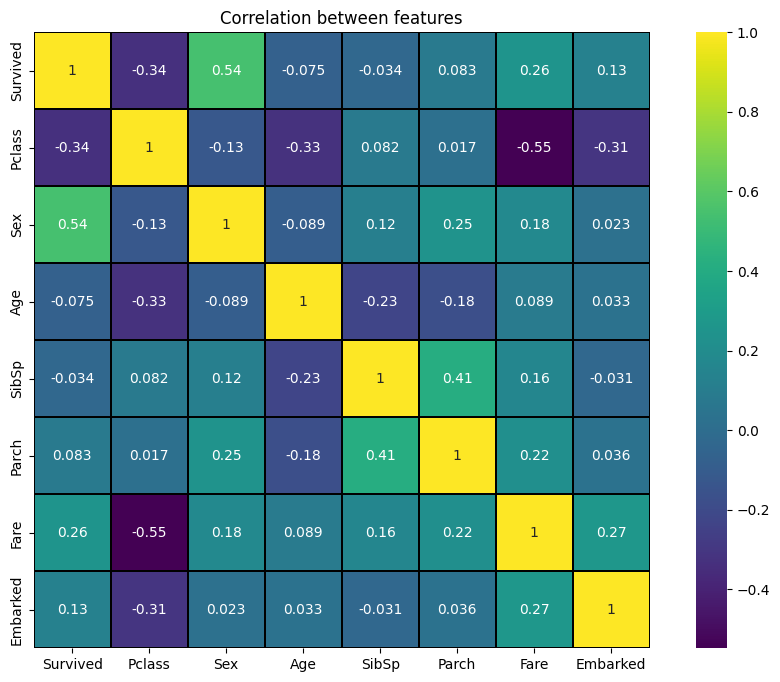

In [202]:
#посмотрим как коррелируют между собой признаки
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=1, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="black")
plt.title('Correlation between features')
plt.show()

## Данные смотрятся неплохо. Пообучаем)

### Начну со случайного леса

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [9]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [220]:
rf = RandomForestClassifier() 

parametrs = {'n_estimators': range(1, 20), 
             'max_depth': range(1, 7),
             'min_samples_leaf': range(1, 6),
             'min_samples_split': range(2, 6)}

grid_search_cv_clf = GridSearchCV(rf, parametrs, n_jobs=-1, cv=5)

grid_search_cv_clf.fit(X, y)

best_rf = grid_search_cv_clf.best_estimator_

In [221]:
best_rf

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=11)

In [224]:
clf = RandomForestClassifier(n_estimators=11, max_depth=5, min_samples_split=3, min_samples_leaf=3, random_state=42)
clf.fit(X, y)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=11, random_state=42)

### Подгружаю тестовые данные и привожу их к виду, как для обучения (те же фичи, те же числовые значения для категориальных)

In [10]:
test_data = pd.read_csv('tested.csv')

In [11]:
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data.Age = test_data.Age.fillna(test_data['Age'].mean())
test_data.Fare = test_data.Fare.fillna(test_data['Fare'].mean())

In [13]:
test_data.Embarked = test_data.Embarked.map({'Q': 0,'S': 1,'C': 2}).astype(int)
test_data.Sex = test_data.Sex.map({'male': 0, 'female': 1}).astype(int)

In [14]:
X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']

In [229]:
y_pred = clf.predict(X_test)

In [230]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.9473684210526315
Precision: 0.9113924050632911
Recall: 0.9473684210526315
F1: 0.9290322580645162


## Попробую логистическую регрессию

In [231]:
from sklearn.linear_model import LogisticRegression

In [235]:
lr = LogisticRegression()

parametres = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(lr, parametres, n_jobs=-1, cv=5)

grid_search.fit(X, y)

best_lr = grid_search.best_estimator_

In [236]:
best_lr

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [237]:
clf_lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=42)
clf_lr.fit(X, y)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [238]:
y_pred_lr = clf_lr.predict(X_test)

In [239]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.9712918660287081
Precision: 0.9545454545454546
Recall: 0.9671052631578947
F1: 0.9607843137254902


## Очень неплохо, но куда без бустинга
## Категориальные признаки преобразованы, но интересно, что покажет CatBoost

In [15]:
from catboost import CatBoostClassifier, Pool, cv

In [16]:
catboost = CatBoostClassifier(logging_level='Silent')

train_pool = Pool(X, y)

parametres = {
    'iterations': range(50, 115, 5),
    'learning_rate': [0.03, 0.05, 0.07, 0.1, 0.12],
    'depth': range(3, 7),
}

grid_search_results = catboost.grid_search(parametres, train_pool, cv=5)

grid_search_results

0:	loss: 0.4435673	best: 0.4435673 (0)	total: 372ms	remaining: 1m 36s
1:	loss: 0.4268810	best: 0.4268810 (1)	total: 441ms	remaining: 56.8s
2:	loss: 0.4211468	best: 0.4211468 (2)	total: 511ms	remaining: 43.8s
3:	loss: 0.4073356	best: 0.4073356 (3)	total: 580ms	remaining: 37.1s
4:	loss: 0.4148531	best: 0.4073356 (3)	total: 656ms	remaining: 33.4s
5:	loss: 0.4383570	best: 0.4073356 (3)	total: 728ms	remaining: 30.8s
6:	loss: 0.4238903	best: 0.4073356 (3)	total: 813ms	remaining: 29.4s
7:	loss: 0.4187592	best: 0.4073356 (3)	total: 886ms	remaining: 27.9s
8:	loss: 0.4068368	best: 0.4068368 (8)	total: 959ms	remaining: 26.7s
9:	loss: 0.4148531	best: 0.4068368 (8)	total: 1.04s	remaining: 26.1s
10:	loss: 0.4368039	best: 0.4068368 (8)	total: 1.14s	remaining: 25.8s
11:	loss: 0.4221993	best: 0.4068368 (8)	total: 1.22s	remaining: 25.2s
12:	loss: 0.4178839	best: 0.4068368 (8)	total: 1.31s	remaining: 24.9s
13:	loss: 0.4046526	best: 0.4046526 (13)	total: 1.39s	remaining: 24.4s
14:	loss: 0.4148531	best: 0.

{'params': {'depth': 4, 'iterations': 85, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
     

In [21]:
clf_catboost = CatBoostClassifier(iterations=85, learning_rate=0.1, depth=4, random_state=42)
clf_catboost.fit(X, y)

0:	learn: 0.6561416	total: 872us	remaining: 73.3ms
1:	learn: 0.6253974	total: 1.75ms	remaining: 72.6ms
2:	learn: 0.5996941	total: 2.42ms	remaining: 66ms
3:	learn: 0.5779504	total: 3.09ms	remaining: 62.5ms
4:	learn: 0.5594524	total: 3.78ms	remaining: 60.5ms
5:	learn: 0.5443361	total: 4.47ms	remaining: 58.8ms
6:	learn: 0.5299490	total: 5.02ms	remaining: 56ms
7:	learn: 0.5141589	total: 5.68ms	remaining: 54.7ms
8:	learn: 0.5033918	total: 6.31ms	remaining: 53.3ms
9:	learn: 0.4921815	total: 7.03ms	remaining: 52.7ms
10:	learn: 0.4816006	total: 7.71ms	remaining: 51.9ms
11:	learn: 0.4742218	total: 8.62ms	remaining: 52.4ms
12:	learn: 0.4703394	total: 9.05ms	remaining: 50.1ms
13:	learn: 0.4651049	total: 9.86ms	remaining: 50ms
14:	learn: 0.4596857	total: 10.6ms	remaining: 49.6ms
15:	learn: 0.4552404	total: 11.3ms	remaining: 48.9ms
16:	learn: 0.4498744	total: 12.2ms	remaining: 48.7ms
17:	learn: 0.4468108	total: 12.9ms	remaining: 47.9ms
18:	learn: 0.4434401	total: 13.6ms	remaining: 47.3ms
19:	learn:

In [22]:
y_pred_catboost = clf_catboost.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred_catboost)
precision = precision_score(y_test, y_pred_catboost)
recall = recall_score(y_test, y_pred_catboost)
f1 = f1_score(y_test, y_pred_catboost)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.9401913875598086
Precision: 0.9440559440559441
Recall: 0.8881578947368421
F1: 0.9152542372881356


### Подбор гиперпараметров бустинга, как и в случае со случайным лесом занимает длительное время. Пока лидерство удерживает логистическая регрессия. Попробую еще несколько простых алгоритмов (Naive Bayes и SVM)

In [22]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gnb = GaussianNB()

parametres = {
    'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07]
}

grid_search = GridSearchCV(gnb, parametres, n_jobs=-1, cv=5)

grid_search.fit(X, y)

best_gnb = grid_search.best_estimator_

In [25]:
best_gnb

GaussianNB(var_smoothing=1e-10)

In [27]:
clf_gnb = GaussianNB(var_smoothing=1e-10)
clf_gnb.fit(X, y)

GaussianNB(var_smoothing=1e-10)

In [28]:
y_pred_gnb = clf_gnb.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.9043062200956937
Precision: 0.8111111111111111
Recall: 0.9605263157894737
F1: 0.8795180722891566


In [19]:
from sklearn.svm import SVC

In [13]:
svm = SVC()

parametres = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, parametres, n_jobs=-1, cv=5)

grid_search.fit(X, y)

best_svm = grid_search.best_estimator_

In [14]:
best_svm

SVC(C=1, kernel='linear')

In [15]:
clf_svm = SVC(C=1, kernel='linear', gamma='scale', random_state=42)
clf_svm.fit(X, y)

SVC(C=1, kernel='linear', random_state=42)

In [16]:
y_pred_svm = clf_svm.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


## Неужели классы линейно разделимы??? Посмотрим на графиках

In [18]:
import seaborn as sns

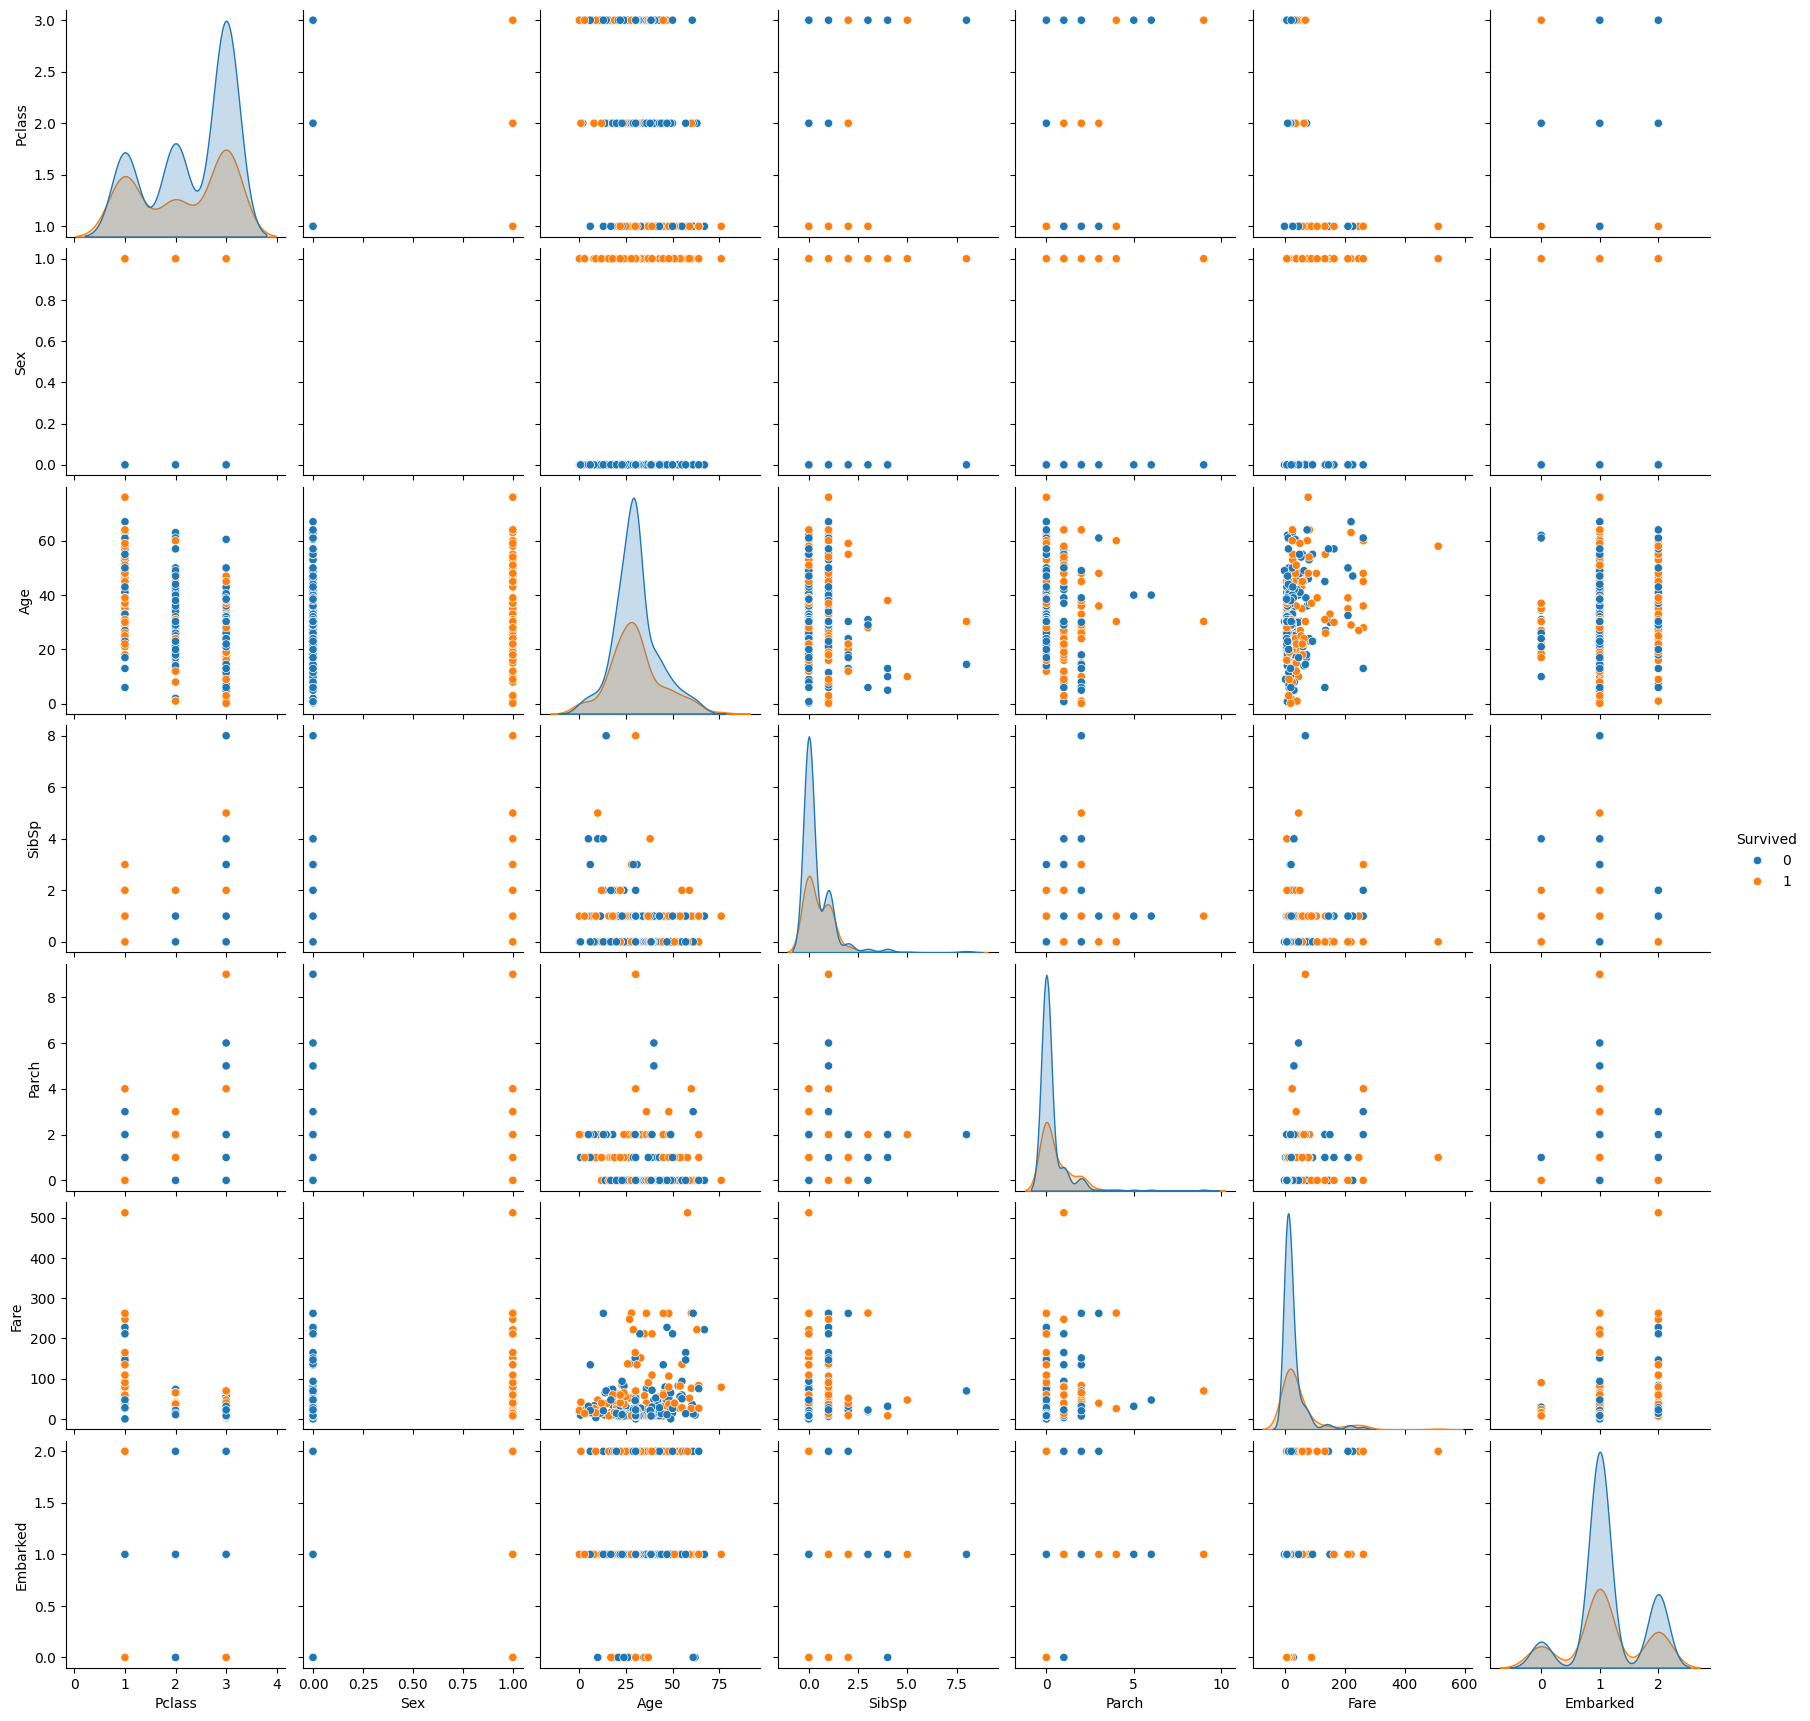

In [22]:
sns.pairplot(test_data, hue='Survived')

## Как видно из графиков, для признака "Sex" есть линейная разделимость. По всей видимости гиперплоскость проходит через нее. Поэтому получаем такое разделение.

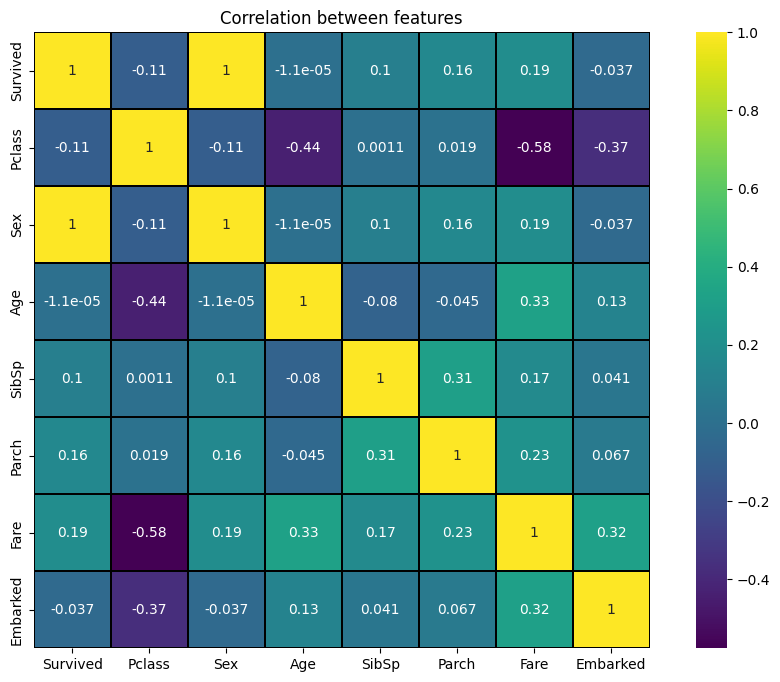

In [24]:
corr = test_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=1, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="black")
plt.title('Correlation between features')
plt.show()

## Да, между признаками "Sex" и "Survived" корелляция единица. Тестовые данные есть тестовые данные, но в другом наборе данных таких метрик качества от SVM не было бы получено. Для доказательства сделаю собственную тестовую выборку.

In [43]:
X_train, X_test_svm, y_train, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
svm = SVC()

parametres = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, parametres, n_jobs=-1, cv=5)

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

In [45]:
best_svm

SVC(C=10, kernel='linear')

In [46]:
clf_svm = SVC(C=0.1, kernel='linear', gamma='scale', random_state=0)
clf_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=0)

In [47]:
y_pred_svm = clf_svm.predict(X_test_svm)

In [48]:
accuracy = accuracy_score(y_test_svm, y_pred_svm)
precision = precision_score(y_test_svm, y_pred_svm)
recall = recall_score(y_test_svm, y_pred_svm)
f1 = f1_score(y_test_svm, y_pred_svm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.7677902621722846
Precision: 0.7448979591836735
Recall: 0.6636363636363637
F1: 0.7019230769230769


## Что и требовалось доказать

# Резюмирую:
# Лучше всего с задачей справился SVM, НО это не заслуга алгоритма, а заслуга тестовых данных!!!
# Поэтому целесообразно использовать логистическую регрессию, метрики качества которой являются лучшими. К тому же GridSearch гиперпараметров логистической регрессии не требует больших мощностей.
# Затем идут алгоритмы, в основе которых лежат ансамбли деревьев (бэггинг и бустинг). Гиперпараметры подбираются значительно сложнее, чем для логистической регрессии, при этом метрики качества выглядят хуже.
# После приведенных выше алгоритмов можно рассматривать Naive Bayes и SVM.